In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'/content/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [5]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [6]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


TRAIN DATA

In [7]:
x= scaled_features
y= df['TARGET CLASS']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

FITTING KNN MODEL

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
pred = knn.predict(x_test)

In [13]:
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(y_test,pred)
print(cm)

[[135  18]
 [  9 138]]


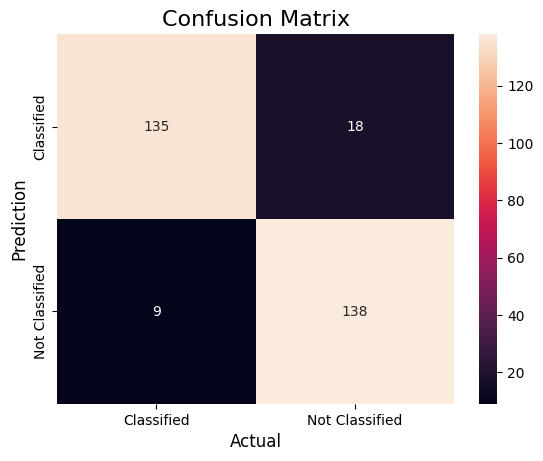

In [14]:
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Classified','Not Classified'],
            yticklabels=['Classified','Not Classified'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       153
           1       0.88      0.94      0.91       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [16]:
from sklearn.model_selection import cross_val_score
#choosing k Value
accuracy_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(knn,df_feat, df['TARGET CLASS'])
  accuracy_rate.append(score.mean())

In [17]:
accuracy_rate

[0.913,
 0.9129999999999999,
 0.9259999999999999,
 0.933,
 0.924,
 0.924,
 0.933,
 0.9369999999999999,
 0.93,
 0.932,
 0.9360000000000002,
 0.933,
 0.9369999999999999,
 0.9359999999999999,
 0.9339999999999999,
 0.9349999999999999,
 0.93,
 0.9339999999999999,
 0.933,
 0.9359999999999999,
 0.932,
 0.9349999999999999,
 0.9359999999999999,
 0.9410000000000001,
 0.9389999999999998,
 0.9390000000000001,
 0.9400000000000001,
 0.943,
 0.9380000000000001,
 0.9390000000000001,
 0.9380000000000001,
 0.9390000000000001,
 0.9390000000000001,
 0.9410000000000001,
 0.937,
 0.943,
 0.9400000000000001,
 0.942,
 0.9400000000000001]

In [18]:
from sklearn.model_selection import cross_val_score
#choosing k Value
errors_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(knn,df_feat, df['TARGET CLASS'])
  errors_rate.append(1-score.mean())

Text(0, 0.5, ' Error Rate')

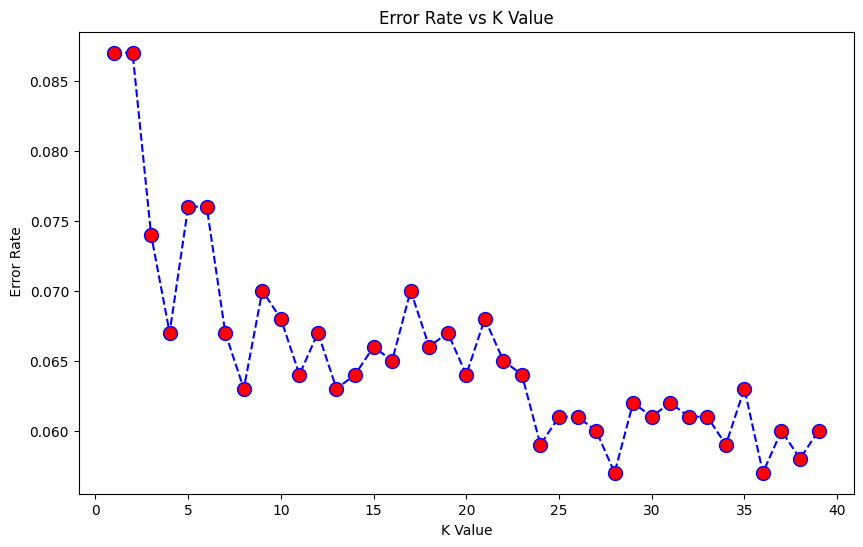

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),errors_rate,color='blue',linestyle = 'dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel('K Value')
plt.ylabel(' Error Rate')

Text(0, 0.5, ' Error Rate')

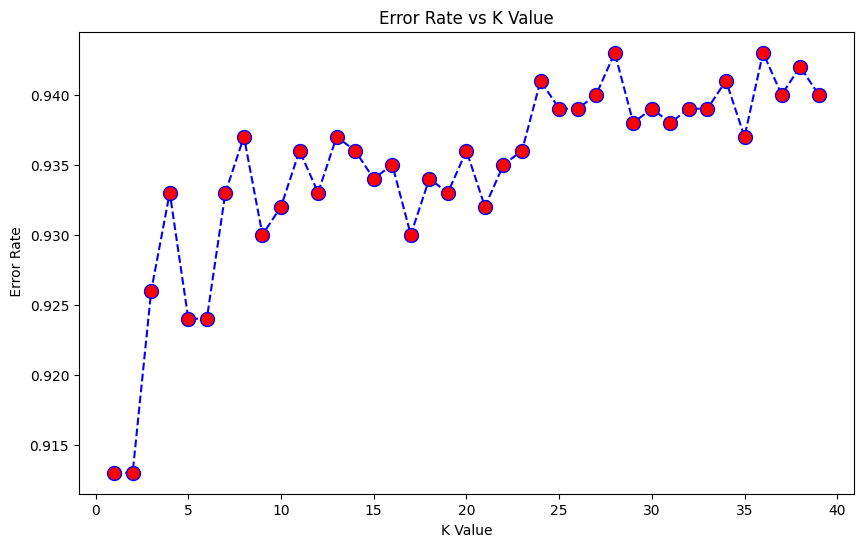

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle = 'dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel('K Value')
plt.ylabel(' Error Rate')

In [21]:
k_max = accuracy_rate.index(max(accuracy_rate))
k_min = accuracy_rate.index(min(accuracy_rate))
print(k_max,k_min)

27 1


In [22]:
#with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With k=1')
print('\n')

cm=metrics.confusion_matrix(y_test,pred)
print(cm)
print(classification_report(y_test,pred))

With k=1


[[135  18]
 [  9 138]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       153
           1       0.88      0.94      0.91       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [23]:
#with k=28
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With k=28')
print('\n')

cm=metrics.confusion_matrix(y_test,pred)
print(cm)
print(classification_report(y_test,pred))

With k=28


[[134  19]
 [  5 142]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       153
           1       0.88      0.97      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

